In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [5]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0119-10.hi.nc')
plotvar = data.variables['hi'][0,:,:]
lont = data.variables['lont_bounds'][:,:,0]
latt = data.variables['latt_bounds'][:,:,0]

In [6]:
lont = lont[250:550,:]
latt = latt[250:550,:]
plotvar = plotvar[250:550,:]

In [7]:

nice_cmap=sns.diverging_palette(245, 15, n=8,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([5,100,130,170,200,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,15,60,80,90,94,98,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

In [9]:
plt.figure(figsize=(25,20))




my_font = {'fontname':'Cambria', 'size':'25'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
                     width = 2500000,height = 1500000) 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,cmap = nice_cmap)
#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
CS=map.contour(x,y,plotvar,[0.1],colors = 'b', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=20)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP)
cbar.ax.tick_params(labelsize=25) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("TIME 0119-10 (HI)",**my_font)
plt.savefig("icecon22.png")

NameError: name 'fig' is not defined

<Figure size 1800x1440 with 0 Axes>

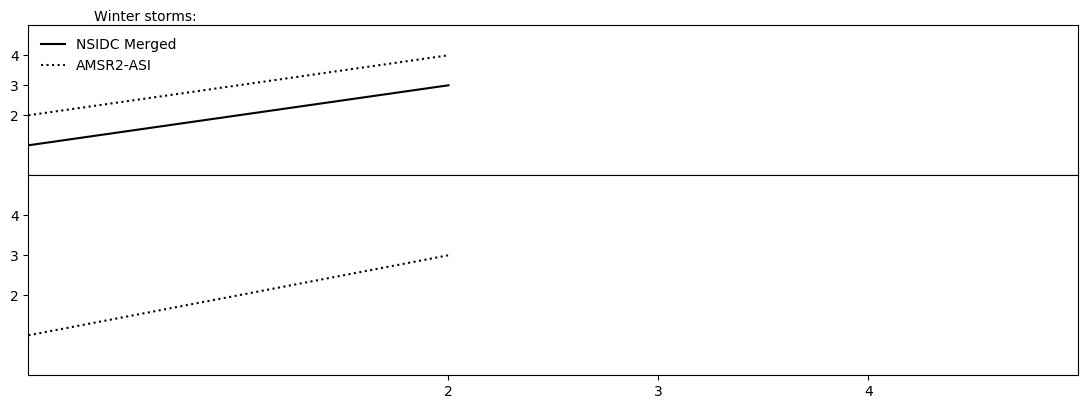

In [52]:
fig = plt.figure(figsize=(15, 10), dpi=100)

fig = plt.figure(figsize=(7,7.5))
plt.plot([1,2,3],'k')
plt.plot([2,3,4],"k:")

plt.ylim([0,5])
plt.gca().set_yticks([2,3,4])
plt.xlim([0,5])
plt.gca().set_xticks([2,3,4])

# add legend
han2, = plt.plot([0,1],[np.nan,np.nan],c='k',ls='-',label='NSIDC Merged')  # dummy handle
han3, = plt.plot([0,1],[np.nan,np.nan],c='k',ls=':',label='AMSR2-ASI')  # dummy handle
plt.legend(handlelength=1.75,loc='upper left',ncol=1,frameon=False)
########################################################################
#plt.text(0.16,1.01,'Winter storms:',horizontalalignment='right',verticalalignment='bottom',
#             transform=plt.gca().transAxes,color='k')


ax1=  fig.add_axes([0.15,0.60,0.7,0.20])

plt.ylim([0,5])
plt.gca().set_yticks([2,3,4])
plt.plot([1,2,3],"k:")

plt.xlim([0,5])
plt.gca().set_xticks([2,3,4])

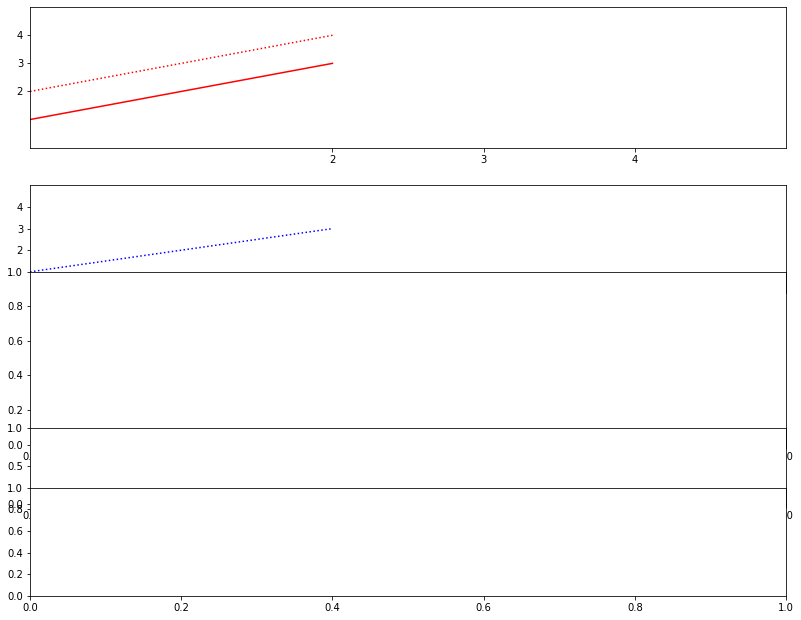

In [72]:
fig = plt.figure(figsize=(15,15))
#######################################
fig.add_axes([0.15,0.835,0.70,0.13])
plt.plot([1,2,3],'r')
plt.plot([2,3,4],"r:")

plt.ylim([0,5])
plt.gca().set_yticks([2,3,4])
plt.xlim([0,5])
plt.gca().set_xticks([2,3,4])
####################################################
con_ax_top = fig.add_axes([0.15,0.70,0.70,0.10])

plt.ylim([0,5])
plt.gca().set_yticks([2,3,4])
plt.plot([1,2,3],"b:")

plt.xlim([0,5])
plt.gca().set_xticks([2,3,4])
#############################
fig.add_axes([0.15,0.56,0.70,0.16])
fig.add_axes([0.15,0.505,0.70,0.07])
con_ax_mid = fig.add_axes([0.15,0.42,0.70,0.10])



In [81]:
xlims = np.arange(1,5,1)
xticks = np.arange(1,5,1)

In [82]:
    def fig_5_axis_prep(ylabel='',spines=[],xlabel_top=False,xlabel_bottom=False,xtick_top=False,xtick_bottom=False,
                        ylabel_pos='left',ylabel_color='k',remove_yticks=[],xgrid=False,ygrid=False,ylabel_offset=0.0,
                        set_ax_xlims=xlims,set_ax_xticks=xticks,ylabel_extra_pad=0):
        plt.xlim(set_ax_xlims)
        if set_ax_xticks is not None: plt.xticks(set_ax_xticks)
        plt.gca().xaxis.set_minor_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.tick_params(axis='x',which='both',top=xtick_top,bottom=xtick_bottom,
                        labeltop=xlabel_top,labelbottom=xlabel_bottom)
        if xgrid and ygrid: plt.gca().grid(linewidth=0.5,alpha=0.3)
        if xgrid: plt.gca().grid(which='minor',axis='x',linewidth=0.25,alpha=0.3)
        if ygrid: plt.gca().grid(which='major',axis='y',linewidth=0.25,alpha=0.3)
        plt.gca().tick_params(axis='both',which='major',labelsize=fontsize)
        [plt.gca().spines[side].set_linewidth(0.5) for side in plt.gca().spines.keys()]
        plt.gca().tick_params(width=0.5)
        if 'top' not in spines: plt.gca().spines['top'].set_visible(False)
        if 'bottom' not in spines: plt.gca().spines['bottom'].set_visible(False)
        for tick in remove_yticks:
            plt.gca().get_yticklabels()[tick].set_visible(False)
            plt.gca().yaxis.get_major_ticks()[tick].set_visible(False)
        if ylabel_pos == 'right':
            plt.gca().yaxis.tick_right()
            plt.gca().yaxis.set_label_position('right')
        plt.gca().patch.set_alpha(0.0)
        if ylabel_pos == 'left':  ylabel_rot = 90
        if ylabel_pos == 'right': ylabel_rot = 90
        plt.ylabel(ylabel,fontsize=fontsize,rotation=ylabel_rot,color=ylabel_color)
        if ylabel_pos == 'left':  plt.gca().get_yaxis().set_label_coords(-0.09 - ylabel_extra_pad,0.5 + ylabel_offset)
        if ylabel_pos == 'right': plt.gca().get_yaxis().set_label_coords(1.09 + ylabel_extra_pad,0.5 + ylabel_offset)
        plt.setp(plt.gca().get_yticklabels(),color=ylabel_color)

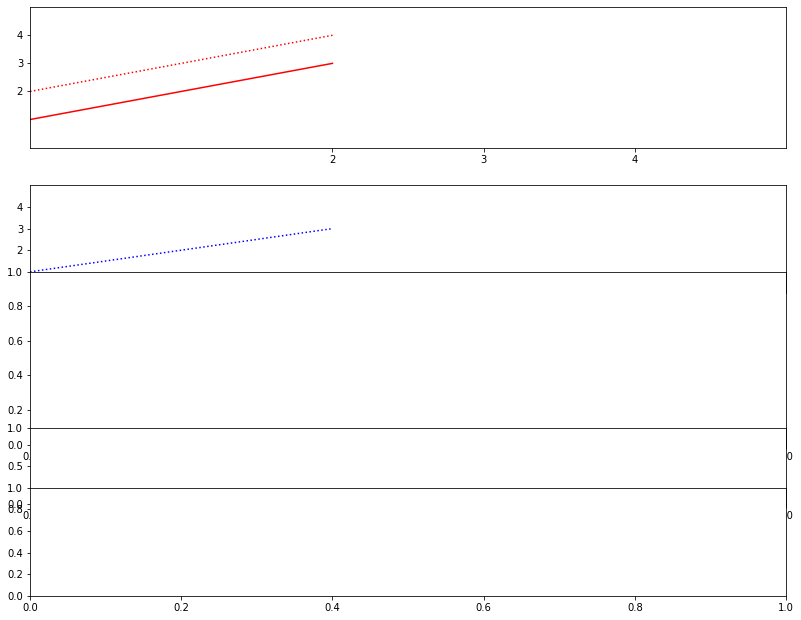

In [84]:
fig = plt.figure(figsize=(15,15))
#######################################
fig.add_axes([0.15,0.835,0.70,0.13])
plt.plot([1,2,3],'r')
plt.plot([2,3,4],"r:")

plt.ylim([0,5])
plt.gca().set_yticks([2,3,4])
plt.xlim([0,5])
plt.gca().set_xticks([2,3,4])
####################################################
con_ax_top = fig.add_axes([0.15,0.70,0.70,0.10])

plt.ylim([0,5])
plt.gca().set_yticks([2,3,4])
plt.plot([1,2,3],"b:")

plt.xlim([0,5])
plt.gca().set_xticks([2,3,4])
#############################
fig.add_axes([0.15,0.56,0.70,0.16])
fig.add_axes([0.15,0.505,0.70,0.07])
con_ax_mid = fig.add_axes([0.15,0.42,0.70,0.10])